# Import

In [1]:
import tensorflow as tf

2024-06-12 20:39:28.348765: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.__version__

'2.16.1'

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout 
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import h5py
import scipy
from PIL import Image
from scipy import ndimage 
import pandas as pd
#from dnn_app_utils_v3 import * 
#from reg_utils import * 
%matplotlib inline

# Load Data

In [5]:
image_dict = {}

from pathlib import Path
from tqdm import tqdm
import os

file_names = []
labels = []

for file in sorted((Path('/Users/laikaiwen/Desktop/deep learning').glob('*/*'))):
    label = str(file).split('/')[-2]  
    labels.append(label)  
    file_names.append(str(file)) 
    
print(len(file_names), len(labels))
df = pd.DataFrame.from_dict({"image": file_names, "label": labels})
print(df.shape)

10905 10905
(10905, 2)


In [6]:
df.head()

,image,label
0,/Users/laikaiwen/Desktop/deep learning/week5/h...,Fake
1,/Users/laikaiwen/Desktop/deep learning/week5/h...,Fake
2,/Users/laikaiwen/Desktop/deep learning/week5/h...,Fake
3,/Users/laikaiwen/Desktop/deep learning/week5/h...,Fake
4,/Users/laikaiwen/Desktop/deep learning/week5/h...,Fake


In [7]:
df['label'].unique()

array(['Fake', 'Real'], dtype=object)

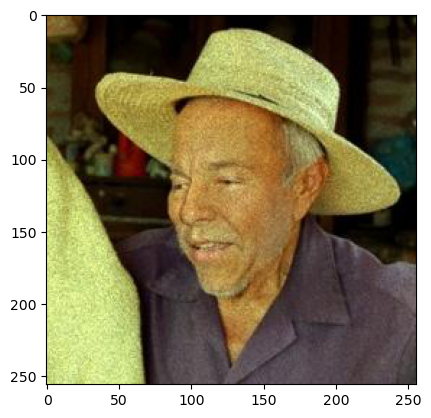

In [8]:
orig_im = Image.open(df['image'][1]) # takes jpg and png
plt.imshow(orig_im)
plt.show()

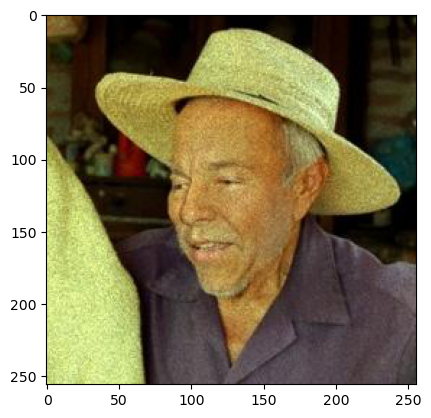

(256, 256, 3)


In [9]:
orig_array = np.asarray(orig_im)
plt.imshow(orig_array)
plt.show()
print(orig_array.shape)

In [10]:
def convert_to_array(image_path):
    image = Image.open(image_path)
    resized_img = image.resize(size=(60, 60))
    resized_array = np.asarray(resized_img)
    return resized_array
df['image'] = df['image'].apply(convert_to_array)

In [11]:
print(df['image'][1].shape)

(60, 60, 3)


In [12]:
df['label'] = df['label'].replace({'Fake': 0, 'Real': 1})

In [13]:
image_array = np.array(df['image'].tolist()) 
label_array = np.array(df['label'].values.tolist())

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X1, X_test, Y1, y_test = train_test_split(image_array, label_array,test_size=0.20)
X_train, X_cv, y_train, y_cv = train_test_split(X1,Y1,test_size = 0.20)

In [16]:
X_train_flatten = X_train.reshape(X_train.shape[0],-1).T 
X_test_flatten = X_test.reshape(X_test.shape[0],-1).T 
X_cv_flatten = X_cv.reshape(X_cv.shape[0],-1).T

# Table for summary statistics.

In [18]:
df

,image,label
0,"[[[2, 2, 2], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
1,"[[[137, 97, 36], [131, 100, 40], [127, 99, 43]...",0
2,"[[[168, 158, 144], [182, 135, 118], [192, 131,...",0
3,"[[[28, 25, 22], [28, 27, 23], [27, 28, 23], [2...",0
4,"[[[33, 33, 33], [32, 32, 32], [36, 36, 36], [6...",0
...,...,...
10900,"[[[232, 199, 232], [255, 220, 255], [241, 206,...",1
10901,"[[[180, 162, 144], [181, 161, 144], [183, 160,...",1
10902,"[[[98, 96, 117], [97, 95, 117], [97, 95, 119],...",1
10903,"[[[215, 203, 199], [228, 213, 193], [187, 182,...",1


# Y: FakeImage(0), RealImage(1)

In [19]:
print('Mean:' ,df['label'].mean())
print('Standard Deviation: ',df['label'].std())
print('Median ', df['label'].median())
print("minimum train y value: ", min(df['label']))
print("maximum train y value: ", max(df['label']))
print('sample size: ',df['label'].size)

Mean: 0.49637780834479595
Standard Deviation:  0.5000098057943084
Median  0.0
minimum train y value:  0
maximum train y value:  1
sample size:  10905


We may need to normalize the input data. This is because each input image may have a different size.

Furthermore, normalizing the input data can also help the model achieve higher prediction accuracy.

Normalization can make all the input features have the same scale and distribution, thereby improving the model's learning efficiency and generalization ability.

In [20]:
X_train = X_train_flatten/255. 
X_test = X_test_flatten/255. 
X_cv = X_cv_flatten/255.

In [21]:
X_train = X_train.T 
X_test = X_test.T 
X_cv = X_cv.T

In [22]:
print("train X shape: ", X_train.shape) 
print("train y shape: ", y_train.shape) 
print("test X shape: ", X_test.shape)   
print("test y shape: ", y_test.shape) 
print('validation x shape: ',X_cv.shape)
print('validation y shape: ',y_cv.shape)

train X shape:  (6979, 10800)
train y shape:  (6979,)
test X shape:  (2181, 10800)
test y shape:  (2181,)
validation x shape:  (1745, 10800)
validation y shape:  (1745,)


# 2) Fit training set well:

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing import image

In [87]:
X1, X_test, Y1, y_test = train_test_split(image_array, label_array,test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X1,Y1,test_size = 0.5, random_state=42)

In [88]:
X_train.shape

(2726, 60, 60, 3)

In [89]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2726, 60, 60, 3)
(2726, 60, 60, 3)
(2726,)
(2726,)


In [96]:
model = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(40, activation="relu"),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(25, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/Users/laikaiwen/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 58, 58, 4)      │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 56, 56, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 54, 54, 4)      │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 52, 52, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 40)             │       432,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 25)             │         1,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,251 (1.66 MB)

 Trainable params: 434,121 (1.66 MB)

 Non-trainable params: 130 (520.00 B)

In [98]:
model.compile(
     optimizer = 'nadam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy']
)

history = model.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 106ms/step - binary_accuracy: 0.5233 - loss: 0.9115
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - binary_accuracy: 0.5410 - loss: 0.7854
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - binary_accuracy: 0.5842 - loss: 0.7024
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - binary_accuracy: 0.6092 - loss: 0.6903
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - binary_accuracy: 0.6598 - loss: 0.6559
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - binary_accuracy: 0.6419 - loss: 0.6433
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - binary_accuracy: 0.6671 - loss: 0.6132
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - binary_accuracy: 0.6997 - loss: 0.5834
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - binary_accuracy: 0.6545 - loss: 0.6152
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - binary_accuracy: 0.6945 - loss: 0.5956


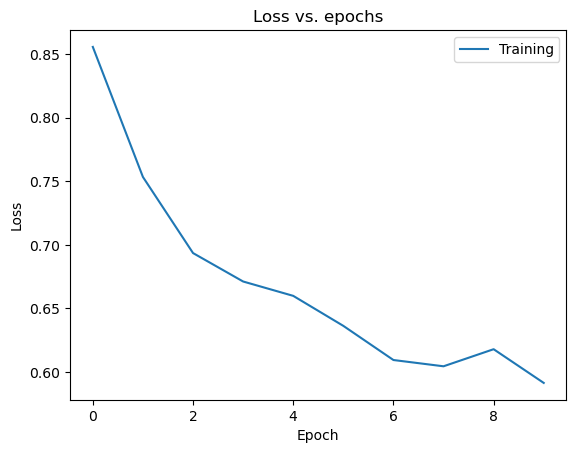

In [99]:
plt.plot(history.history['loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training'], loc='upper right')
plt.show()

In [100]:
df = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

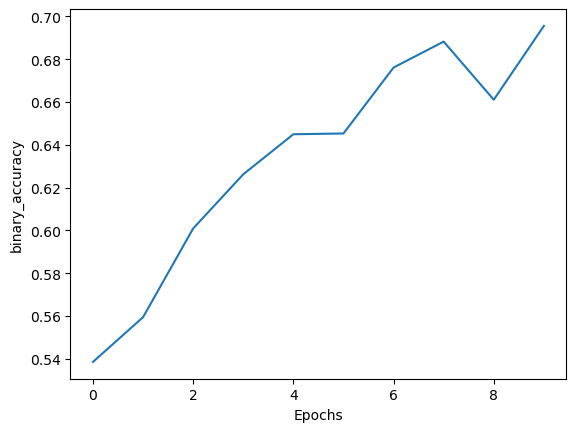

In [101]:
accuracy_plot =df.plot(y="binary_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="binary_accuracy")

a. We use training accuracy to evaluate our training dataset.
Since in this dataset, predicting the image is a deepfake or real image, false positive and false negative are equally important.
We care about the TP, TN, FP, FN, so we use training accuracy here.

b. 
Our training accuracy after 10 epochs is about 70%, which is better than human's random guess (50%).

In [79]:
X_train_flatten = X_train.reshape(X_train.shape[0],-1).T 
X_test_flatten = X_test.reshape(X_test.shape[0],-1).T 
X_cv_flatten = X_cv.reshape(X_cv.shape[0],-1).T

In [80]:
X_train2 = X_train_flatten/255. 
X_test2 = X_test_flatten/255. 
X_cv2 = X_cv_flatten/255.

In [81]:
X_train2 = X_train2.T 
X_test2 = X_test2.T 
X_cv2 = X_cv2.T

In [82]:
X_train2.shape

(2726, 10800)

# compare to logistic regression model 

In [83]:
model2 = Sequential([
    Dense(1, activation='sigmoid', input_shape = (10800,))
])

/Users/laikaiwen/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model2.compile(
     optimizer = 'nadam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy']
)

history = model2.fit(X_train2, y_train, epochs=10, batch_size=64)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.5110 - loss: 0.6927
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5583 - loss: 0.6897 
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5992 - loss: 0.6867
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5966 - loss: 0.6834
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6067 - loss: 0.6787
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6257 - loss: 0.6770
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6338 - loss: 0.6723
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6194 - loss: 0.6732
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.6268 - loss: 0.6716
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.6391 - loss: 0.6652


In [85]:
df = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

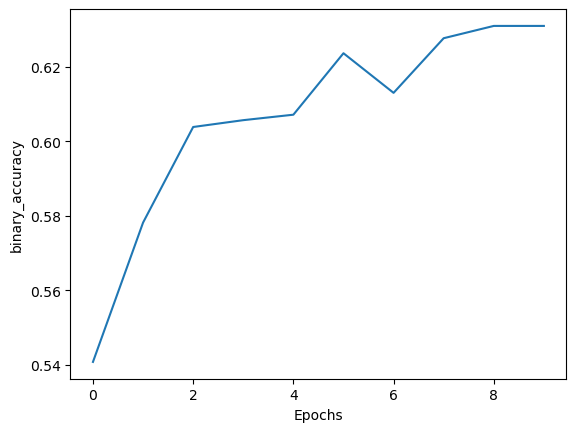

In [86]:
accuracy_plot =df.plot(y="binary_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="binary_accuracy")

 the training accuracy of logistic regression model after 10 epoches is about 63%

In [91]:
# improve with more hidden layer 
model3 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(40, activation="relu"),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(40, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(25, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [92]:
model3.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 58, 58, 4)      │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 56, 56, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 54, 54, 4)      │           148 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 52, 52, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 40)             │       432,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 40)             │         1,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 25)             │         1,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 25)             │           100 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 436,051 (1.66 MB)

 Trainable params: 435,841 (1.66 MB)

 Non-trainable params: 210 (840.00 B)

In [102]:
model3.compile(
     optimizer = 'nadam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy']
)

history = model3.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - binary_accuracy: 0.5050 - loss: 1.1371
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - binary_accuracy: 0.5341 - loss: 0.9667
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - binary_accuracy: 0.5239 - loss: 0.9279
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - binary_accuracy: 0.5592 - loss: 0.8588
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - binary_accuracy: 0.5912 - loss: 0.7510
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - binary_accuracy: 0.5735 - loss: 0.7531
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - binary_accuracy: 0.5941 - loss: 0.7297
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - binary_accuracy: 0.6079 - loss: 0.7006
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - binary_accuracy: 0.6269 - loss: 0.6713
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 131ms/step - binary_accuracy: 0.5923 - loss: 0.7000


In [103]:
df = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

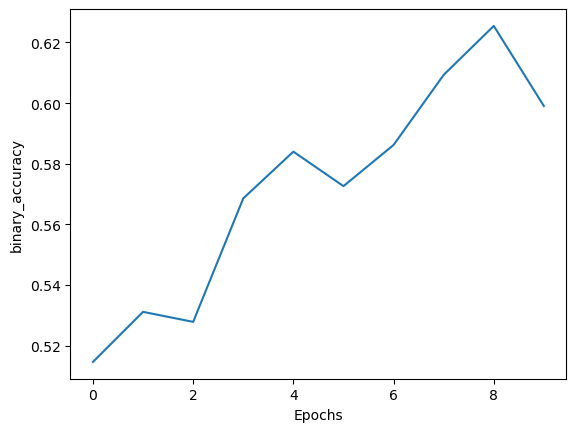

In [104]:
accuracy_plot =df.plot(y="binary_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="binary_accuracy")

the training accuracy for increase hidden later after 10 epoches is about 60%

In [106]:
# improve with diffirent hidden units
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(30, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [107]:
model4.compile(
     optimizer = 'nadam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy']
)

history = model4.fit(X_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 157ms/step - binary_accuracy: 0.5539 - loss: 0.8739
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - binary_accuracy: 0.5725 - loss: 0.7787
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - binary_accuracy: 0.6159 - loss: 0.7004
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - binary_accuracy: 0.6387 - loss: 0.6494
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - binary_accuracy: 0.6635 - loss: 0.6127
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - binary_accuracy: 0.6397 - loss: 0.6696
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 128ms/step - binary_accuracy: 0.6900 - loss: 0.6010
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - binary_accuracy: 0.6989 - loss: 0.5733
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - binary_accuracy: 0.7070 - loss: 0.5632
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - binary_accuracy: 0.7377 - loss: 0.5300


In [108]:
df = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

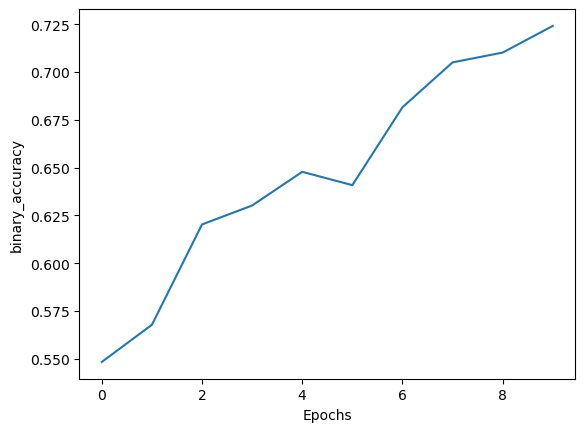

In [109]:
accuracy_plot =df.plot(y="binary_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="binary_accuracy")

the training accuracy of increase hidden units is 73%

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - binary_accuracy: 0.7302 - loss: 0.5343
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - binary_accuracy: 0.7439 - loss: 0.5275
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - binary_accuracy: 0.7585 - loss: 0.4886
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - binary_accuracy: 0.7625 - loss: 0.4855
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 133ms/step - binary_accuracy: 0.7469 - loss: 0.5114
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - binary_accuracy: 0.7642 - loss: 0.4763
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - binary_accuracy: 0.7991 - loss: 0.4440
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 143ms/step - binary_accuracy: 0.8133 - loss: 0.4051
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - binary_accuracy: 0.8192 - loss: 0.4053
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - binary_accuracy: 0.8186 - loss: 0.4110


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

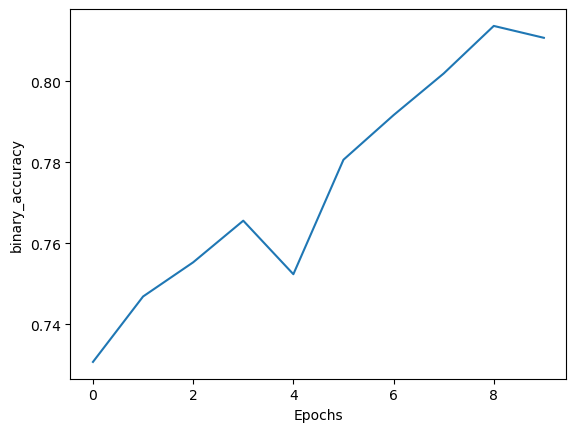

In [112]:
model4.compile(
    optimizer = 'adam',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model4.fit(X_train, y_train, epochs=10, batch_size=64)

df = pd.DataFrame(history.history)
accuracy_plot =df.plot(y="binary_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="binary_accuracy")

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - binary_accuracy: 0.8028 - loss: 0.4238
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - binary_accuracy: 0.8145 - loss: 0.4003
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - binary_accuracy: 0.8307 - loss: 0.3852
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - binary_accuracy: 0.8329 - loss: 0.3649
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - binary_accuracy: 0.8255 - loss: 0.3818
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - binary_accuracy: 0.8627 - loss: 0.3206
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - binary_accuracy: 0.8590 - loss: 0.3356
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - binary_accuracy: 0.8501 - loss: 0.3234
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - binary_accuracy: 0.8560 - loss: 0.3108
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - binary_accuracy: 0.8510 - loss: 0.3098


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

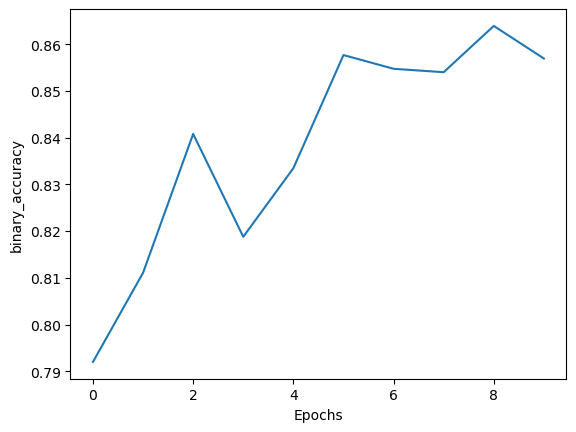

In [113]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model4.fit(X_train, y_train, epochs=10, batch_size=64)

df = pd.DataFrame(history.history)
accuracy_plot =df.plot(y="binary_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="binary_accuracy")

e.
the training accuracy of using nadam is 73%.
the training accuracy of using adam is 81%.  
the training accuracy of using rmsprop is 85%.

Epoch 1/13
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - binary_accuracy: 0.8706 - loss: 0.2963
Epoch 2/13
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - binary_accuracy: 0.8579 - loss: 0.3154
Epoch 3/13
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - binary_accuracy: 0.8659 - loss: 0.2893
Epoch 4/13
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - binary_accuracy: 0.8870 - loss: 0.2803
Epoch 5/13
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - binary_accuracy: 0.8870 - loss: 0.2674
Epoch 6/13
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - binary_accuracy: 0.9023 - loss: 0.2421
Epoch 7/13
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - binary_accuracy: 0.8900 - loss: 0.2509
Epoch 8/13
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - binary_accuracy: 0.9027 - loss: 0.2225
Epoch 9/13
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - binary_accuracy: 0.9057 - loss: 0.2265
Epoch 10/13
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - binary_accuracy: 0.9057 - loss: 0.2207
Epoch 11/13
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - binary_accurac

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

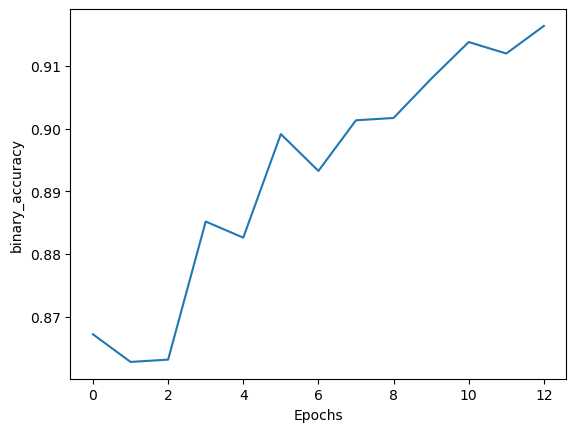

In [114]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model4.fit(X_train, y_train, epochs=13, batch_size=64)

df = pd.DataFrame(history.history)
accuracy_plot =df.plot(y="binary_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="binary_accuracy")

Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - binary_accuracy: 0.8998 - loss: 0.2280
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 138ms/step - binary_accuracy: 0.9165 - loss: 0.1932
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - binary_accuracy: 0.9109 - loss: 0.2219
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - binary_accuracy: 0.9138 - loss: 0.2113
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - binary_accuracy: 0.9121 - loss: 0.1984
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - binary_accuracy: 0.9109 - loss: 0.2268
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - binary_accuracy: 0.9206 - loss: 0.1932
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - binary_accuracy: 0.9300 - loss: 0.1649
Epoch 9/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - binary_accuracy: 0.9260 - loss: 0.1934
Epoch 10/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - binary_accuracy: 0.9337 - loss: 0.1474
Epoch 11/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - binary_accurac

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

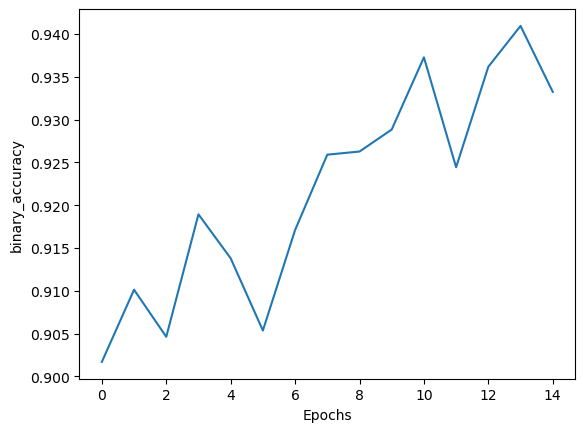

In [115]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model4.fit(X_train, y_train, epochs=15, batch_size=64)

df = pd.DataFrame(history.history)
accuracy_plot =df.plot(y="binary_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="binary_accuracy")

f.
the training accuracy of using 10 epoches is 85%.
the training accuracy of using 13 epoches is 92%.  
the training accuracy of using 15 epoches is 92.7%.

In [116]:
model5 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_initializer='random_uniform'),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(30, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/Users/laikaiwen/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - binary_accuracy: 0.5376 - loss: 0.8979
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - binary_accuracy: 0.6032 - loss: 0.7480
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - binary_accuracy: 0.6104 - loss: 0.7247
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - binary_accuracy: 0.6499 - loss: 0.6755
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - binary_accuracy: 0.6631 - loss: 0.6570
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - binary_accuracy: 0.6581 - loss: 0.6447
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - binary_accuracy: 0.6963 - loss: 0.5837
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - binary_accuracy: 0.7048 - loss: 0.5647
Epoch 9/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - binary_accuracy: 0.7225 - loss: 0.5247
Epoch 10/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - binary_accuracy: 0.7378 - loss: 0.5145
Epoch 11/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - binary_accura

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

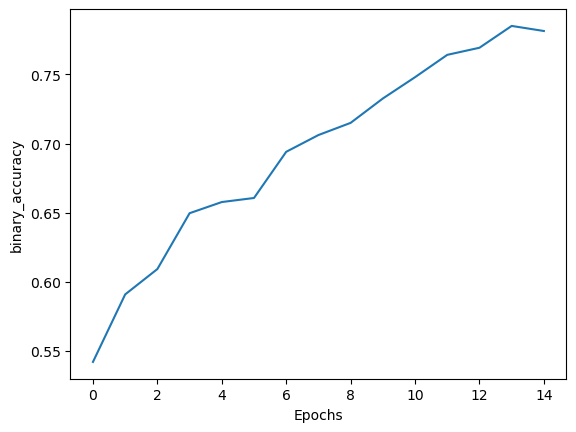

In [117]:
model5.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model5.fit(X_train, y_train, epochs=15, batch_size=64)

df = pd.DataFrame(history.history)
accuracy_plot =df.plot(y="binary_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="binary_accuracy")

In [118]:
model6 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_initializer='he_uniform'),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(30, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/Users/laikaiwen/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - binary_accuracy: 0.5566 - loss: 0.9181
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - binary_accuracy: 0.5887 - loss: 0.7785
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - binary_accuracy: 0.6368 - loss: 0.7058
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - binary_accuracy: 0.6223 - loss: 0.6828
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - binary_accuracy: 0.6408 - loss: 0.6678
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 148ms/step - binary_accuracy: 0.6332 - loss: 0.6601
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - binary_accuracy: 0.6677 - loss: 0.6280
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - binary_accuracy: 0.6505 - loss: 0.6220
Epoch 9/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - binary_accuracy: 0.6821 - loss: 0.5862
Epoch 10/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - binary_accuracy: 0.7081 - loss: 0.5478
Epoch 11/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - binary_accura

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

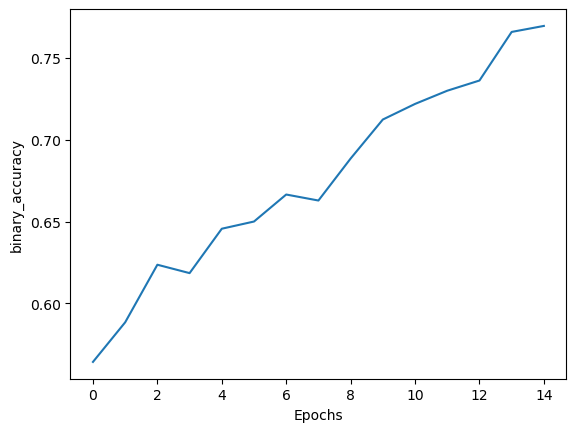

In [119]:
model6.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model6.fit(X_train, y_train, epochs=15, batch_size=64)

df = pd.DataFrame(history.history)
accuracy_plot =df.plot(y="binary_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="binary_accuracy")

In [122]:
model6 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_initializer='zeros'),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(30, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - binary_accuracy: 0.4947 - loss: 0.6932
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - binary_accuracy: 0.4871 - loss: 0.6935
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 157ms/step - binary_accuracy: 0.4894 - loss: 0.6933
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - binary_accuracy: 0.4983 - loss: 0.6932
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - binary_accuracy: 0.4834 - loss: 0.6934
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - binary_accuracy: 0.4988 - loss: 0.6932
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - binary_accuracy: 0.5060 - loss: 0.6931
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 140ms/step - binary_accuracy: 0.4696 - loss: 0.6936
Epoch 9/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - binary_accuracy: 0.4899 - loss: 0.6936
Epoch 10/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 7s 152ms/step - binary_accuracy: 0.5052 - loss: 0.6932
Epoch 11/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - binary_accur

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'binary_accuracy')]

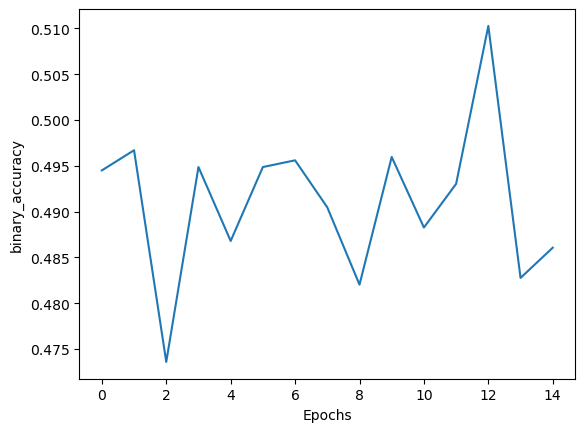

In [123]:
model6.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model6.fit(X_train, y_train, epochs=15, batch_size=64)

df = pd.DataFrame(history.history)
accuracy_plot =df.plot(y="binary_accuracy", legend=False)
accuracy_plot.set(xlabel="Epochs", ylabel="binary_accuracy")

g.
the training accuracy of using kernel_initializer='random_uniform' is 78%.
the training accuracy of using kernel_initializer='he_uniform' is 77%.  
the training accuracy of using kernel_initializer='zeros' is 49%.

h.The best model is model4

# 3)Fit validation set well:

In [124]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(30, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/Users/laikaiwen/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - binary_accuracy: 0.7046 - loss: 0.5614 - val_binary_accuracy: 0.7363 - val_loss: 0.5187
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - binary_accuracy: 0.7378 - loss: 0.5338 - val_binary_accuracy: 0.7326 - val_loss: 0.5355
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - binary_accuracy: 0.7452 - loss: 0.5204 - val_binary_accuracy: 0.7436 - val_loss: 0.5068
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - binary_accuracy: 0.7426 - loss: 0.5177 - val_binary_accuracy: 0.6740 - val_loss: 0.5873
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - binary_accuracy: 0.7468 - loss: 0.5187 - val_binary_accuracy: 0.6740 - val_loss: 0.5782
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - binary_accuracy: 0.7709 - loss: 0.4757 - val_binary_accuracy: 0.7491 - val_loss: 0.5007
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - binary_accuracy: 0.7806 - loss: 0.4665 - val_binary_accuracy: 0.7436 - val_loss: 0.5064
Epoch 

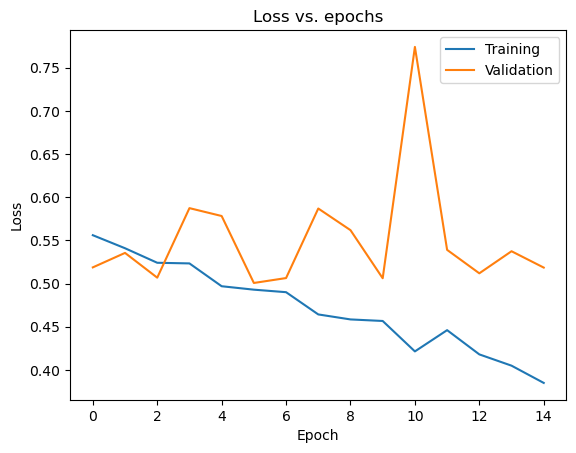

In [134]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

a. We have an overfitting problem for the model, as our training loss is getting lower while our validation loss is not.

b.

In [150]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 153ms/step - binary_accuracy: 0.5303 - loss: 11.2544 - val_binary_accuracy: 0.5623 - val_loss: 1.3853
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - binary_accuracy: 0.5822 - loss: 1.0799 - val_binary_accuracy: 0.5659 - val_loss: 0.9725
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - binary_accuracy: 0.6543 - loss: 0.8136 - val_binary_accuracy: 0.6300 - val_loss: 0.8221
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - binary_accuracy: 0.6788 - loss: 0.7261 - val_binary_accuracy: 0.6117 - val_loss: 0.8298
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - binary_accuracy: 0.7251 - loss: 0.6720 - val_binary_accuracy: 0.5659 - val_loss: 0.9465
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - binary_accuracy: 0.7700 - loss: 0.5537 - val_binary_accuracy: 0.6685 - val_loss: 0.7560
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 168ms/step - binary_accuracy: 0.8543 - loss: 0.4623 - val_binary_accuracy: 0.6337 - val_loss: 0.9406
Epoc

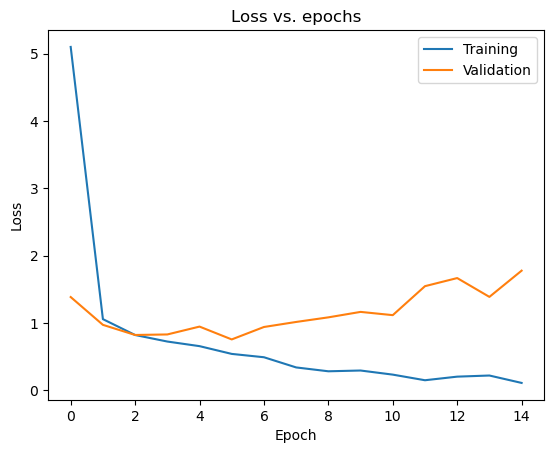

In [151]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [152]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.005)),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step - binary_accuracy: 0.5161 - loss: 2.8219 - val_binary_accuracy: 0.5678 - val_loss: 1.2756
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - binary_accuracy: 0.6568 - loss: 1.1075 - val_binary_accuracy: 0.5678 - val_loss: 1.2563
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - binary_accuracy: 0.7215 - loss: 0.9391 - val_binary_accuracy: 0.5824 - val_loss: 1.1434
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - binary_accuracy: 0.7591 - loss: 0.8191 - val_binary_accuracy: 0.5842 - val_loss: 1.1354
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - binary_accuracy: 0.8143 - loss: 0.6864 - val_binary_accuracy: 0.5623 - val_loss: 1.3230
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - binary_accuracy: 0.8157 - loss: 0.7124 - val_binary_accuracy: 0.5568 - val_loss: 1.4590
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - binary_accuracy: 0.8563 - loss: 0.6325 - val_binary_accuracy: 0.5678 - val_loss: 1.3491
Epo

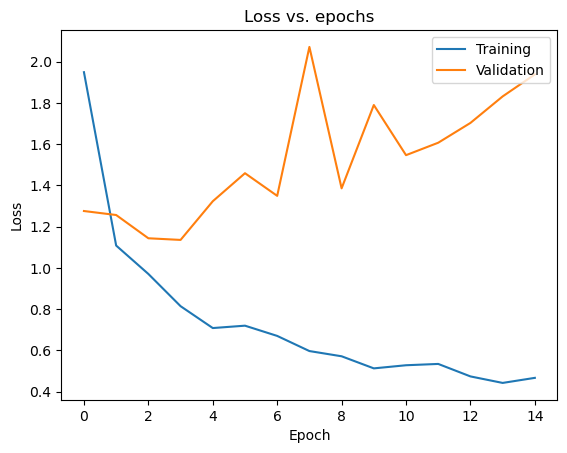

In [153]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history2 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [154]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - binary_accuracy: 0.5036 - loss: 55.5308 - val_binary_accuracy: 0.5989 - val_loss: 1.8898
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - binary_accuracy: 0.5910 - loss: 2.1978 - val_binary_accuracy: 0.5330 - val_loss: 1.6592
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - binary_accuracy: 0.6390 - loss: 1.4685 - val_binary_accuracy: 0.5824 - val_loss: 1.4353
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - binary_accuracy: 0.6699 - loss: 1.2842 - val_binary_accuracy: 0.5348 - val_loss: 1.3003
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - binary_accuracy: 0.7345 - loss: 0.9847 - val_binary_accuracy: 0.5476 - val_loss: 1.2351
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - binary_accuracy: 0.7891 - loss: 0.7997 - val_binary_accuracy: 0.5183 - val_loss: 1.3045
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - binary_accuracy: 0.8330 - loss: 0.7434 - val_binary_accuracy: 0.5495 - val_loss: 1.9836
Epoch

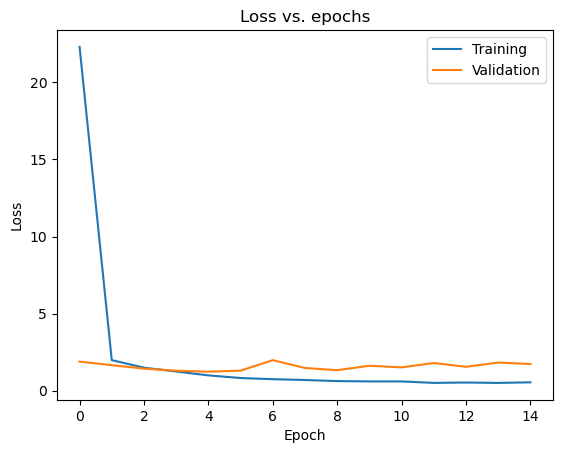

In [155]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history3 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [156]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.05)),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - binary_accuracy: 0.5439 - loss: 42.4937 - val_binary_accuracy: 0.5311 - val_loss: 9.6545
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - binary_accuracy: 0.6186 - loss: 7.4917 - val_binary_accuracy: 0.5824 - val_loss: 4.9678
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - binary_accuracy: 0.6670 - loss: 4.1444 - val_binary_accuracy: 0.5348 - val_loss: 3.4559
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - binary_accuracy: 0.6731 - loss: 2.5249 - val_binary_accuracy: 0.5989 - val_loss: 2.0146
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - binary_accuracy: 0.7293 - loss: 1.7523 - val_binary_accuracy: 0.6630 - val_loss: 1.6574
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - binary_accuracy: 0.7515 - loss: 1.3640 - val_binary_accuracy: 0.6593 - val_loss: 1.4244
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - binary_accuracy: 0.7868 - loss: 1.1393 - val_binary_accuracy: 0.6465 - val_loss: 1.3262
Epoc

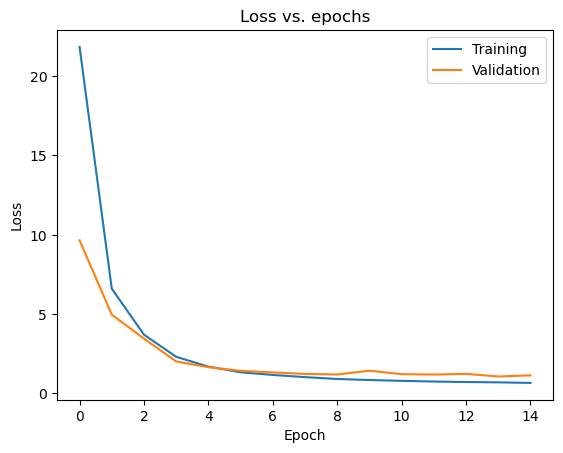

In [157]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history4 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [158]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.1)),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - binary_accuracy: 0.4858 - loss: 123.4442 - val_binary_accuracy: 0.4872 - val_loss: 15.9141
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - binary_accuracy: 0.5008 - loss: 15.7686 - val_binary_accuracy: 0.6117 - val_loss: 8.1581
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - binary_accuracy: 0.5905 - loss: 7.4876 - val_binary_accuracy: 0.5128 - val_loss: 5.9063
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - binary_accuracy: 0.5568 - loss: 4.0044 - val_binary_accuracy: 0.5330 - val_loss: 2.5509
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - binary_accuracy: 0.5512 - loss: 2.2497 - val_binary_accuracy: 0.5513 - val_loss: 1.6659
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - binary_accuracy: 0.5517 - loss: 1.5390 - val_binary_accuracy: 0.5183 - val_loss: 1.2617
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - binary_accuracy: 0.5537 - loss: 1.1715 - val_binary_accuracy: 0.5311 - val_loss: 0.9784
Ep

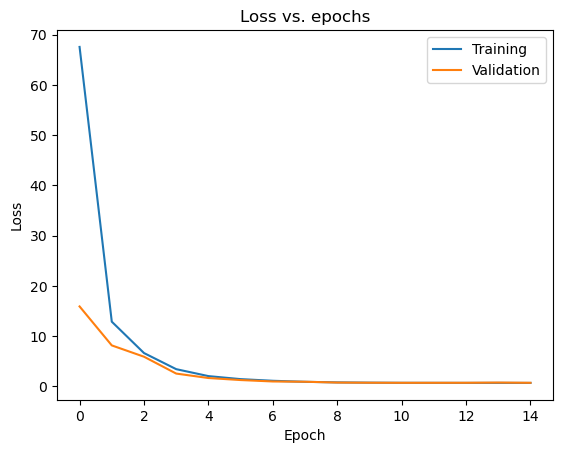

In [159]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history5 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

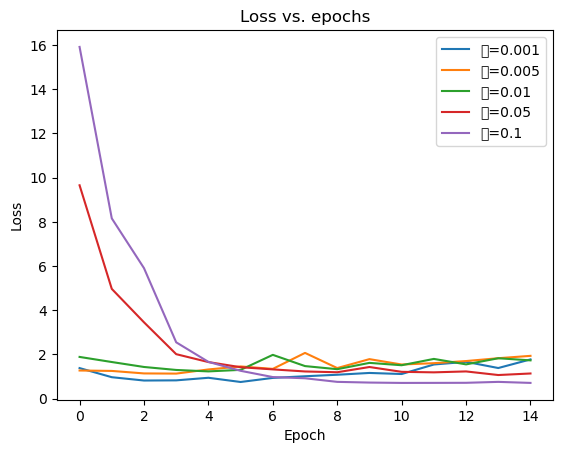

In [160]:
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])
plt.plot(history5.history['val_loss'])

plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['𝜆=0.001', '𝜆=0.005','𝜆=0.01','𝜆=0.05','𝜆=0.1'], loc='upper right')
plt.show()

c.

In [161]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    Dropout(0.5),
    Dense(30, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - binary_accuracy: 0.5057 - loss: 27.4490 - val_binary_accuracy: 0.5128 - val_loss: 0.7136
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - binary_accuracy: 0.4820 - loss: 0.7725 - val_binary_accuracy: 0.5201 - val_loss: 0.6927
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - binary_accuracy: 0.5023 - loss: 0.8646 - val_binary_accuracy: 0.5403 - val_loss: 0.6895
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - binary_accuracy: 0.5020 - loss: 0.7474 - val_binary_accuracy: 0.5147 - val_loss: 0.6943
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - binary_accuracy: 0.4934 - loss: 0.7156 - val_binary_accuracy: 0.5147 - val_loss: 0.6931
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - binary_accuracy: 0.5030 - loss: 0.7007 - val_binary_accuracy: 0.5165 - val_loss: 0.6929
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - binary_accuracy: 0.4952 - loss: 0.6977 - val_binary_accuracy: 0.5147 - val_loss: 0.6931
Epo

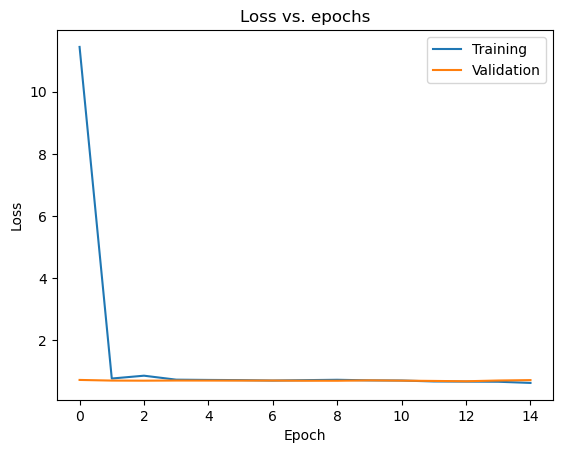

In [162]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [163]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    Dropout(0.4),
    Dense(30, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - binary_accuracy: 0.5103 - loss: 4.4884 - val_binary_accuracy: 0.5495 - val_loss: 0.7303
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - binary_accuracy: 0.5599 - loss: 0.8275 - val_binary_accuracy: 0.5220 - val_loss: 0.7171
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - binary_accuracy: 0.5473 - loss: 0.7783 - val_binary_accuracy: 0.5238 - val_loss: 0.7165
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - binary_accuracy: 0.5656 - loss: 0.6759 - val_binary_accuracy: 0.5165 - val_loss: 0.7493
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - binary_accuracy: 0.5942 - loss: 0.6884 - val_binary_accuracy: 0.5293 - val_loss: 0.7832
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - binary_accuracy: 0.5980 - loss: 0.6707 - val_binary_accuracy: 0.5220 - val_loss: 0.9114
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - binary_accuracy: 0.6297 - loss: 0.6232 - val_binary_accuracy: 0.5458 - val_loss: 0.8778
Epoch 

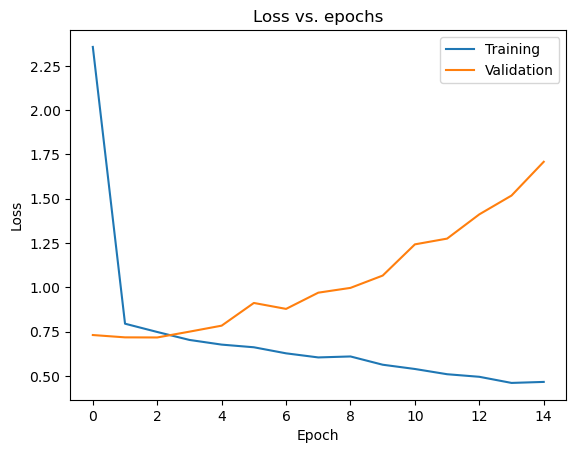

In [164]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history2 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [165]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    Dropout(0.3),
    Dense(30, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - binary_accuracy: 0.4960 - loss: 51.2353 - val_binary_accuracy: 0.5201 - val_loss: 3.0968
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - binary_accuracy: 0.5069 - loss: 1.0118 - val_binary_accuracy: 0.4927 - val_loss: 0.7028
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step - binary_accuracy: 0.4930 - loss: 0.7871 - val_binary_accuracy: 0.5092 - val_loss: 0.7101
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - binary_accuracy: 0.4887 - loss: 0.7053 - val_binary_accuracy: 0.4853 - val_loss: 0.6932
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - binary_accuracy: 0.5190 - loss: 0.7623 - val_binary_accuracy: 0.5568 - val_loss: 0.7012
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - binary_accuracy: 0.5273 - loss: 0.7035 - val_binary_accuracy: 0.5476 - val_loss: 0.6684
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - binary_accuracy: 0.5606 - loss: 0.7305 - val_binary_accuracy: 0.5311 - val_loss: 0.6792
Epoch

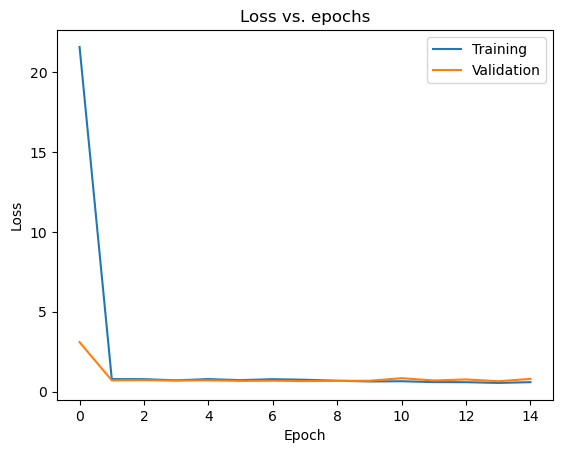

In [166]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history3 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [167]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    Dropout(0.2),
    Dense(30, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - binary_accuracy: 0.4942 - loss: 108.0706 - val_binary_accuracy: 0.4799 - val_loss: 0.7146
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - binary_accuracy: 0.5073 - loss: 1.3805 - val_binary_accuracy: 0.4835 - val_loss: 0.6968
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - binary_accuracy: 0.4983 - loss: 0.7669 - val_binary_accuracy: 0.4853 - val_loss: 0.6933
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - binary_accuracy: 0.5185 - loss: 0.7765 - val_binary_accuracy: 0.5055 - val_loss: 0.6952
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - binary_accuracy: 0.5094 - loss: 0.7160 - val_binary_accuracy: 0.5586 - val_loss: 0.6788
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - binary_accuracy: 0.5354 - loss: 0.7061 - val_binary_accuracy: 0.5659 - val_loss: 0.6980
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - binary_accuracy: 0.5913 - loss: 0.6715 - val_binary_accuracy: 0.5458 - val_loss: 0.7107
Epoc

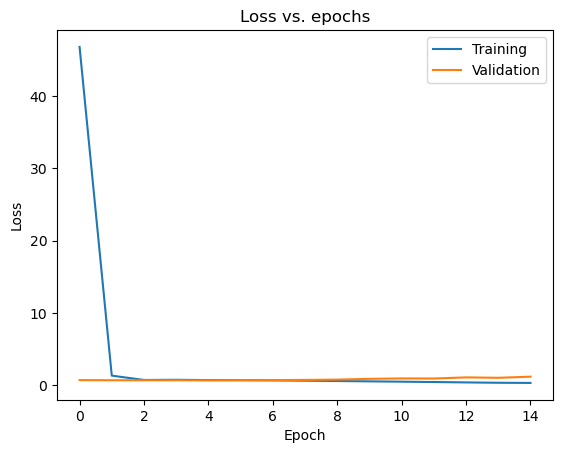

In [168]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history4 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [169]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    Dropout(0.1),
    Dense(30, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - binary_accuracy: 0.5412 - loss: 35.0883 - val_binary_accuracy: 0.5495 - val_loss: 0.8334
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 195ms/step - binary_accuracy: 0.6033 - loss: 0.8327 - val_binary_accuracy: 0.5604 - val_loss: 0.7719
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - binary_accuracy: 0.6437 - loss: 0.6568 - val_binary_accuracy: 0.5678 - val_loss: 0.8146
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - binary_accuracy: 0.6836 - loss: 0.5612 - val_binary_accuracy: 0.5586 - val_loss: 1.6383
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - binary_accuracy: 0.7177 - loss: 0.5875 - val_binary_accuracy: 0.5678 - val_loss: 1.1354
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - binary_accuracy: 0.7711 - loss: 0.4323 - val_binary_accuracy: 0.5495 - val_loss: 1.2662
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - binary_accuracy: 0.7920 - loss: 0.3843 - val_binary_accuracy: 0.5733 - val_loss: 1.4356
Epoch

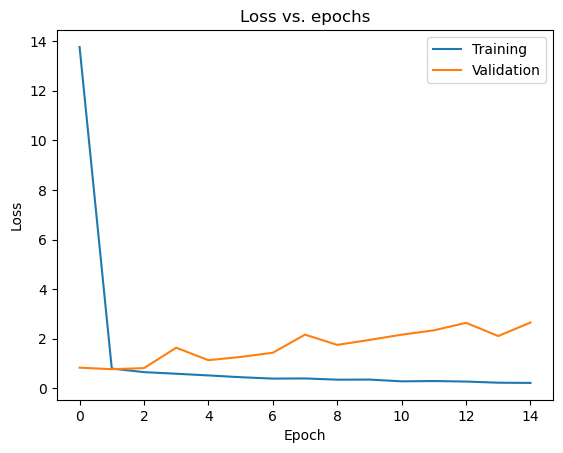

In [170]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history5 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

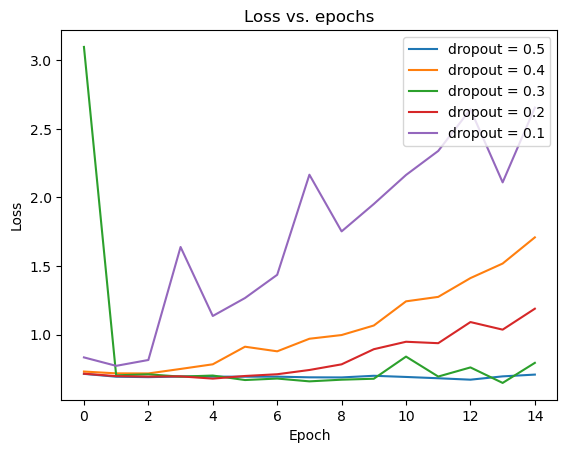

In [171]:
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])
plt.plot(history5.history['val_loss'])

plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['dropout = 0.5', 'dropout = 0.4','dropout = 0.3','dropout = 0.2','dropout = 0.1'], loc='upper right')
plt.show()

d.

In [172]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 160ms/step - binary_accuracy: 0.5345 - loss: 128.0690 - val_binary_accuracy: 0.5092 - val_loss: 0.8378
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - binary_accuracy: 0.4833 - loss: 0.8380 - val_binary_accuracy: 0.5165 - val_loss: 0.8139
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 207ms/step - binary_accuracy: 0.4882 - loss: 0.9749 - val_binary_accuracy: 0.5128 - val_loss: 0.8025
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - binary_accuracy: 0.4950 - loss: 3.4029 - val_binary_accuracy: 0.4890 - val_loss: 0.7866
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - binary_accuracy: 0.5055 - loss: 0.8079 - val_binary_accuracy: 0.4963 - val_loss: 0.7912
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - binary_accuracy: 0.5132 - loss: 0.7878 - val_binary_accuracy: 0.5183 - val_loss: 11.7140
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - binary_accuracy: 0.5327 - loss: 1.4079 - val_binary_accuracy: 0.5476 - val_loss: 0.7417
Epo

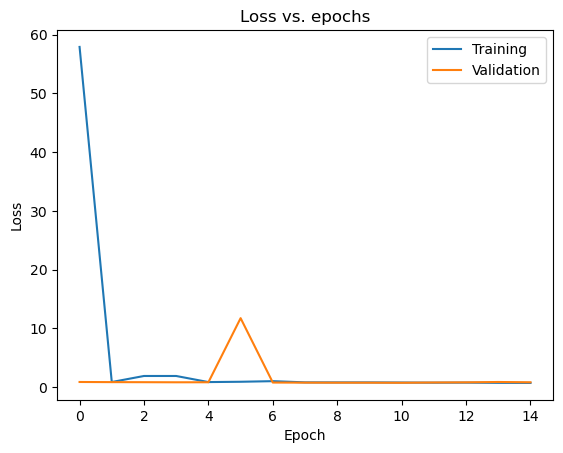

In [173]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [174]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.005)),
    Dropout(0.5),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - binary_accuracy: 0.5193 - loss: 49.6574 - val_binary_accuracy: 0.5385 - val_loss: 1.1561
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - binary_accuracy: 0.5021 - loss: 1.1598 - val_binary_accuracy: 0.5385 - val_loss: 1.0566
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - binary_accuracy: 0.5114 - loss: 1.0727 - val_binary_accuracy: 0.5366 - val_loss: 0.9819
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - binary_accuracy: 0.5091 - loss: 1.0940 - val_binary_accuracy: 0.5659 - val_loss: 0.9465
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - binary_accuracy: 0.5503 - loss: 0.9864 - val_binary_accuracy: 0.5806 - val_loss: 0.8755
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - binary_accuracy: 0.5735 - loss: 0.9211 - val_binary_accuracy: 0.5440 - val_loss: 0.8583
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - binary_accuracy: 0.5447 - loss: 0.8358 - val_binary_accuracy: 0.5366 - val_loss: 0.8211
Epoch

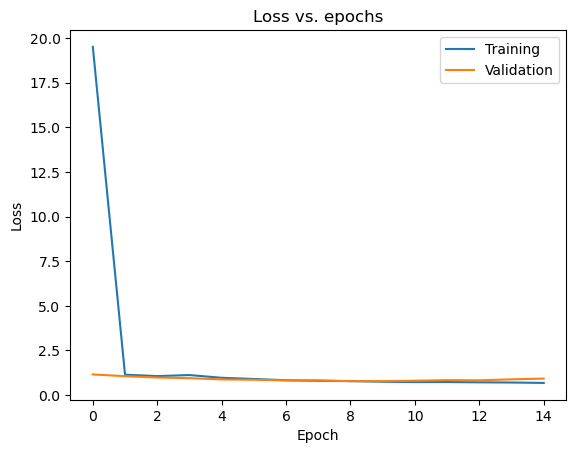

In [175]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history2 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [176]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.005)),
    Dropout(0.3),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - binary_accuracy: 0.5494 - loss: 8.8243 - val_binary_accuracy: 0.5513 - val_loss: 1.4274
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - binary_accuracy: 0.5622 - loss: 1.5595 - val_binary_accuracy: 0.5220 - val_loss: 1.3334
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - binary_accuracy: 0.5628 - loss: 1.2989 - val_binary_accuracy: 0.5201 - val_loss: 1.1568
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - binary_accuracy: 0.5840 - loss: 1.0746 - val_binary_accuracy: 0.5861 - val_loss: 1.0155
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - binary_accuracy: 0.5969 - loss: 0.9438 - val_binary_accuracy: 0.5385 - val_loss: 0.9551
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - binary_accuracy: 0.6224 - loss: 0.8663 - val_binary_accuracy: 0.5476 - val_loss: 0.9260
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - binary_accuracy: 0.6498 - loss: 0.8001 - val_binary_accuracy: 0.5458 - val_loss: 0.9251
Epoch 

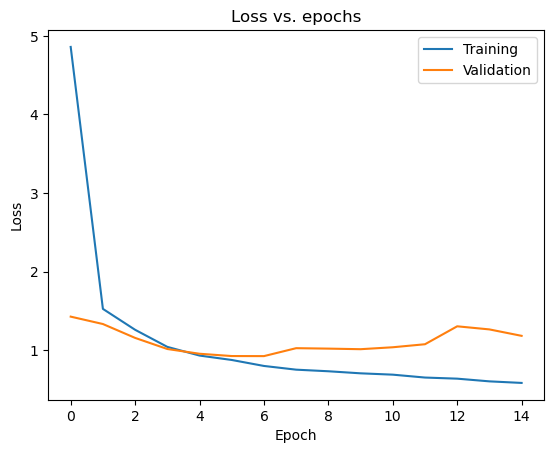

In [177]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history3 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [178]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - binary_accuracy: 0.4801 - loss: 61.1618 - val_binary_accuracy: 0.5366 - val_loss: 1.9612
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - binary_accuracy: 0.5636 - loss: 1.9911 - val_binary_accuracy: 0.5348 - val_loss: 1.6714
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - binary_accuracy: 0.5706 - loss: 1.6503 - val_binary_accuracy: 0.5568 - val_loss: 1.3992
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - binary_accuracy: 0.5570 - loss: 1.3329 - val_binary_accuracy: 0.5440 - val_loss: 1.2217
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - binary_accuracy: 0.5724 - loss: 1.0917 - val_binary_accuracy: 0.5586 - val_loss: 1.0562
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - binary_accuracy: 0.5799 - loss: 0.9557 - val_binary_accuracy: 0.5256 - val_loss: 0.9878
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - binary_accuracy: 0.6050 - loss: 0.8802 - val_binary_accuracy: 0.5440 - val_loss: 1.0062
Epoch

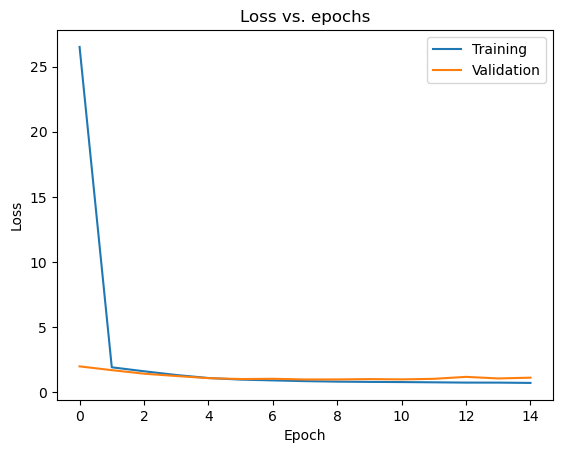

In [179]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history4 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [180]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.5),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 189ms/step - binary_accuracy: 0.4942 - loss: 86.8622 - val_binary_accuracy: 0.5147 - val_loss: 7.9174
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - binary_accuracy: 0.4764 - loss: 7.9405 - val_binary_accuracy: 0.4872 - val_loss: 5.1422
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - binary_accuracy: 0.4928 - loss: 4.6251 - val_binary_accuracy: 0.4853 - val_loss: 3.1700
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - binary_accuracy: 0.4996 - loss: 4.1752 - val_binary_accuracy: 0.4853 - val_loss: 1.8506
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - binary_accuracy: 0.5155 - loss: 1.8934 - val_binary_accuracy: 0.4853 - val_loss: 1.3185
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - binary_accuracy: 0.5035 - loss: 1.2294 - val_binary_accuracy: 0.4853 - val_loss: 1.0062
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - binary_accuracy: 0.5062 - loss: 0.9552 - val_binary_accuracy: 0.4853 - val_loss: 0.8328
Epoch

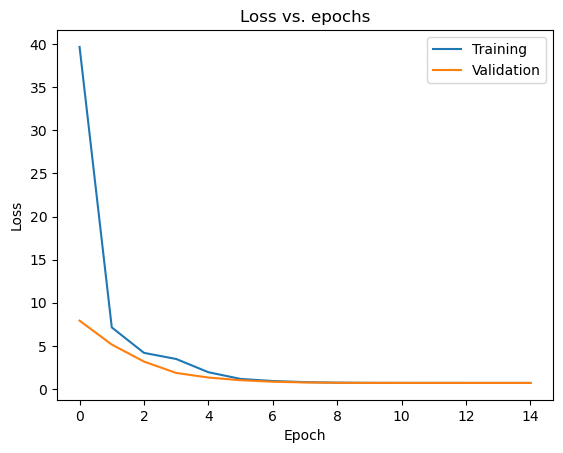

In [181]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history5 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

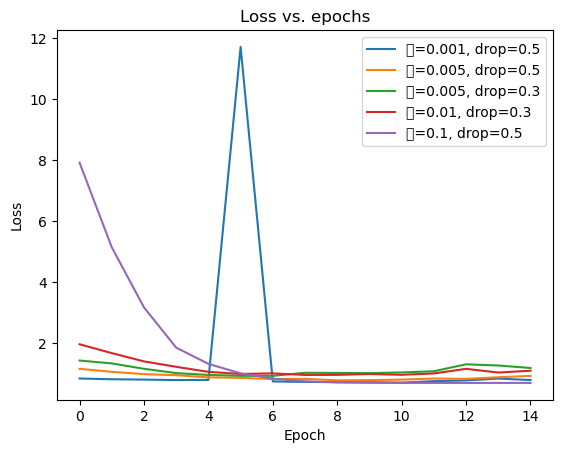

In [182]:
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])
plt.plot(history5.history['val_loss'])

plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['𝜆=0.001, drop=0.5', '𝜆=0.005, drop=0.5','𝜆=0.005, drop=0.3','𝜆=0.01, drop=0.3','𝜆=0.1, drop=0.5'], loc='upper right')
plt.show()

e.

In [183]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    BatchNormalization(), 
    Dense(30, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - binary_accuracy: 0.6139 - loss: 0.7331 - val_binary_accuracy: 0.5275 - val_loss: 1.2270
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - binary_accuracy: 0.7677 - loss: 0.4952 - val_binary_accuracy: 0.5238 - val_loss: 1.4581
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - binary_accuracy: 0.8187 - loss: 0.4293 - val_binary_accuracy: 0.6062 - val_loss: 0.9894
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - binary_accuracy: 0.8332 - loss: 0.3864 - val_binary_accuracy: 0.6319 - val_loss: 0.9571
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 185ms/step - binary_accuracy: 0.8802 - loss: 0.3165 - val_binary_accuracy: 0.6923 - val_loss: 0.5888
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - binary_accuracy: 0.9146 - loss: 0.2514 - val_binary_accuracy: 0.6465 - val_loss: 0.7177
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - binary_accuracy: 0.9394 - loss: 0.2172 - val_binary_accuracy: 0.6960 - val_loss: 0.8082
Epoc

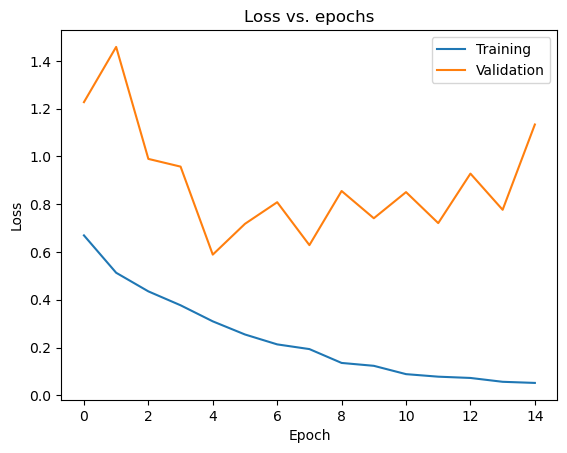

In [184]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [185]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    BatchNormalization(momentum=0.95), 
    Dense(30, activation='relu'),
    BatchNormalization(momentum=0.95),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - binary_accuracy: 0.6003 - loss: 0.7627 - val_binary_accuracy: 0.6593 - val_loss: 0.6461
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - binary_accuracy: 0.7478 - loss: 0.5096 - val_binary_accuracy: 0.5861 - val_loss: 1.2946
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - binary_accuracy: 0.7997 - loss: 0.4367 - val_binary_accuracy: 0.6740 - val_loss: 0.7373
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - binary_accuracy: 0.8637 - loss: 0.3544 - val_binary_accuracy: 0.6832 - val_loss: 0.7246
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - binary_accuracy: 0.8666 - loss: 0.3273 - val_binary_accuracy: 0.6777 - val_loss: 0.9284
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - binary_accuracy: 0.8941 - loss: 0.2761 - val_binary_accuracy: 0.6062 - val_loss: 1.0225
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - binary_accuracy: 0.9231 - loss: 0.2134 - val_binary_accuracy: 0.6264 - val_loss: 1.4998
Epoch 

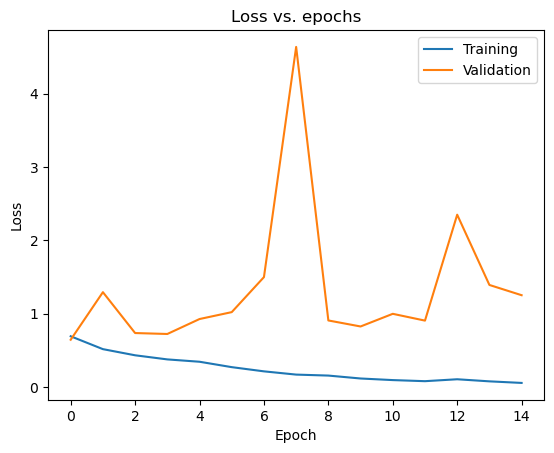

In [186]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history2 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [187]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    BatchNormalization(momentum=0.9), 
    Dense(30, activation='relu'),
    BatchNormalization(momentum=0.9),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 147ms/step - binary_accuracy: 0.5555 - loss: 0.7069 - val_binary_accuracy: 0.5421 - val_loss: 0.7194
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - binary_accuracy: 0.6347 - loss: 0.6393 - val_binary_accuracy: 0.5824 - val_loss: 0.7967
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 135ms/step - binary_accuracy: 0.6629 - loss: 0.6058 - val_binary_accuracy: 0.5147 - val_loss: 1.0757
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 128ms/step - binary_accuracy: 0.7133 - loss: 0.5724 - val_binary_accuracy: 0.5476 - val_loss: 0.8423
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - binary_accuracy: 0.7458 - loss: 0.5323 - val_binary_accuracy: 0.5934 - val_loss: 0.6764
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - binary_accuracy: 0.7559 - loss: 0.5117 - val_binary_accuracy: 0.5806 - val_loss: 0.6975
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - binary_accuracy: 0.7687 - loss: 0.4613 - val_binary_accuracy: 0.5513 - val_loss: 0.9597
Epoch 

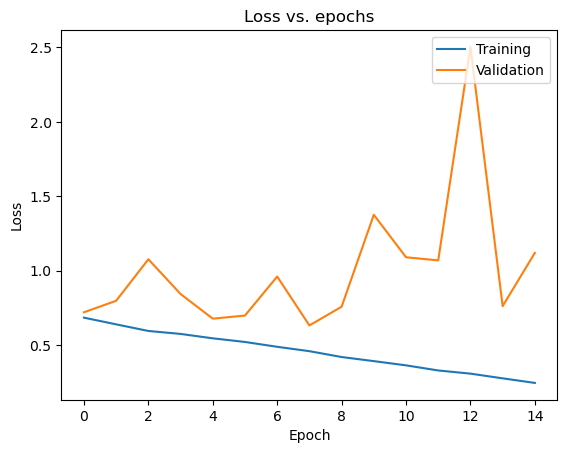

In [188]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history3 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [189]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    BatchNormalization(epsilon=0.00000001), 
    Dense(30, activation='relu'),
    BatchNormalization(epsilon=0.00000001),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - binary_accuracy: 0.5661 - loss: 0.7857 - val_binary_accuracy: 0.5788 - val_loss: 0.6850
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - binary_accuracy: 0.6681 - loss: 0.6283 - val_binary_accuracy: 0.5311 - val_loss: 0.8339
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - binary_accuracy: 0.7329 - loss: 0.5393 - val_binary_accuracy: 0.5824 - val_loss: 0.7267
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 120ms/step - binary_accuracy: 0.7748 - loss: 0.4864 - val_binary_accuracy: 0.6392 - val_loss: 0.6475
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - binary_accuracy: 0.8097 - loss: 0.4400 - val_binary_accuracy: 0.6722 - val_loss: 0.6583
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - binary_accuracy: 0.8399 - loss: 0.3803 - val_binary_accuracy: 0.6557 - val_loss: 0.6348
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - binary_accuracy: 0.8768 - loss: 0.3178 - val_binary_accuracy: 0.7051 - val_loss: 0.6206
Epoch

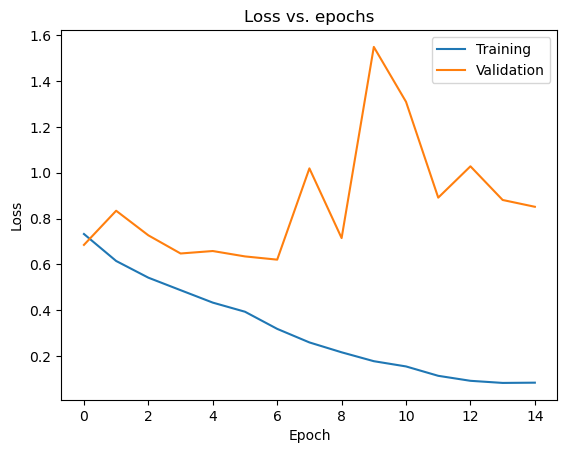

In [190]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history4 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [191]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    BatchNormalization(epsilon=0.0001), 
    Dense(30, activation='relu'),
    BatchNormalization(epsilon=0.0001),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - binary_accuracy: 0.5581 - loss: 0.7466 - val_binary_accuracy: 0.5275 - val_loss: 0.8728
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - binary_accuracy: 0.6909 - loss: 0.5731 - val_binary_accuracy: 0.5641 - val_loss: 0.6876
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - binary_accuracy: 0.7680 - loss: 0.4886 - val_binary_accuracy: 0.4908 - val_loss: 1.3039
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - binary_accuracy: 0.8021 - loss: 0.4213 - val_binary_accuracy: 0.4945 - val_loss: 1.1256
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - binary_accuracy: 0.8121 - loss: 0.4068 - val_binary_accuracy: 0.5586 - val_loss: 0.8372
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - binary_accuracy: 0.8695 - loss: 0.3245 - val_binary_accuracy: 0.5366 - val_loss: 1.0696
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - binary_accuracy: 0.8854 - loss: 0.2970 - val_binary_accuracy: 0.5275 - val_loss: 1.3499
Epoc

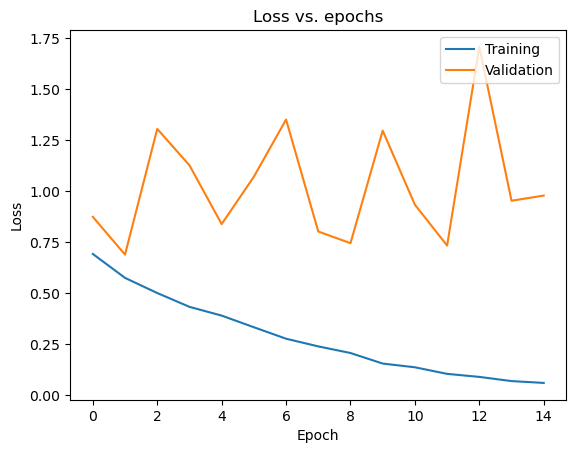

In [192]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history5 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

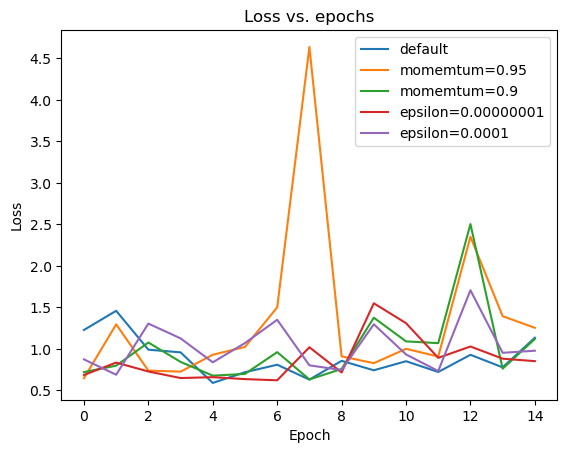

In [193]:
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])
plt.plot(history5.history['val_loss'])

plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['default', 'momentum=0.95','momentum=0.9','epsilon=0.00000001','epsilon=0.0001'], loc='upper right')
plt.show()

f.

In [194]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(30, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step - binary_accuracy: 0.5502 - loss: 0.8319 - val_binary_accuracy: 0.5513 - val_loss: 0.7752
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 133ms/step - binary_accuracy: 0.5935 - loss: 0.7262 - val_binary_accuracy: 0.6154 - val_loss: 0.7093
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - binary_accuracy: 0.6148 - loss: 0.7263 - val_binary_accuracy: 0.6136 - val_loss: 0.6622
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - binary_accuracy: 0.6386 - loss: 0.6833 - val_binary_accuracy: 0.6648 - val_loss: 0.6341
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - binary_accuracy: 0.6509 - loss: 0.6415 - val_binary_accuracy: 0.6410 - val_loss: 0.6624
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - binary_accuracy: 0.6795 - loss: 0.6196 - val_binary_accuracy: 0.6593 - val_loss: 0.6292
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - binary_accuracy: 0.7039 - loss: 0.5743 - val_binary_accuracy: 0.6685 - val_loss: 0.6516
Epoch 

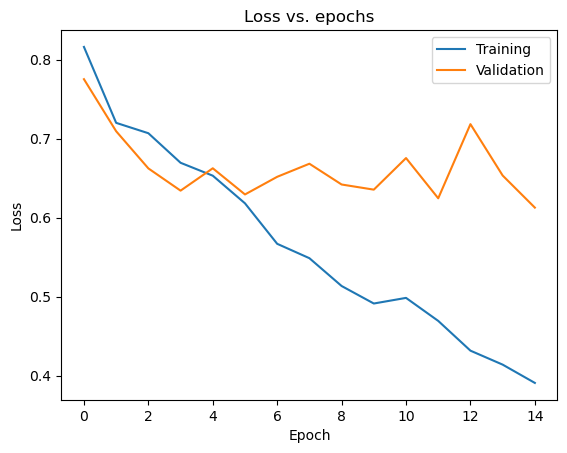

In [195]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [196]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    BatchNormalization(), 
    Dropout(0.4),
    Dense(30, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step - binary_accuracy: 0.5299 - loss: 0.8017 - val_binary_accuracy: 0.5293 - val_loss: 1.3148
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - binary_accuracy: 0.5743 - loss: 0.7394 - val_binary_accuracy: 0.5256 - val_loss: 0.9054
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - binary_accuracy: 0.6048 - loss: 0.6902 - val_binary_accuracy: 0.5183 - val_loss: 0.8011
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - binary_accuracy: 0.5948 - loss: 0.6895 - val_binary_accuracy: 0.6099 - val_loss: 0.7459
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 199ms/step - binary_accuracy: 0.6067 - loss: 0.6806 - val_binary_accuracy: 0.6722 - val_loss: 0.6161
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - binary_accuracy: 0.6484 - loss: 0.6433 - val_binary_accuracy: 0.5842 - val_loss: 0.6882
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step - binary_accuracy: 0.6805 - loss: 0.6087 - val_binary_accuracy: 0.4853 - val_loss: 1.4015
Epoch 

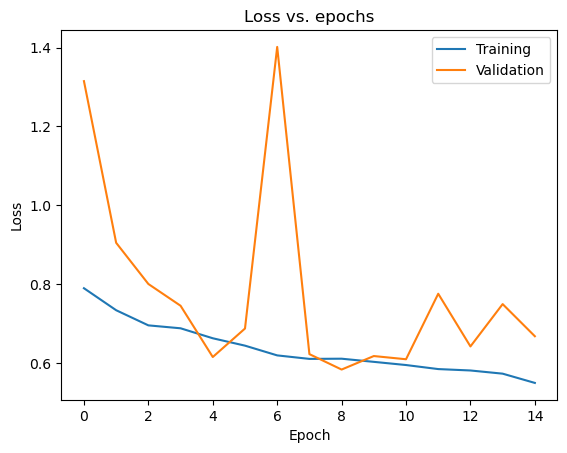

In [197]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history2 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [198]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    BatchNormalization(momentum=0.95), 
    Dropout(0.5),
    Dense(30, activation='relu'),
    BatchNormalization(momentum=0.95),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - binary_accuracy: 0.5258 - loss: 0.9128 - val_binary_accuracy: 0.5568 - val_loss: 0.7943
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - binary_accuracy: 0.5820 - loss: 0.7688 - val_binary_accuracy: 0.6172 - val_loss: 0.7118
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - binary_accuracy: 0.5938 - loss: 0.7044 - val_binary_accuracy: 0.6502 - val_loss: 0.6222
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - binary_accuracy: 0.6365 - loss: 0.6622 - val_binary_accuracy: 0.6795 - val_loss: 0.6221
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 176ms/step - binary_accuracy: 0.6706 - loss: 0.6302 - val_binary_accuracy: 0.6703 - val_loss: 0.5903
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - binary_accuracy: 0.6445 - loss: 0.6573 - val_binary_accuracy: 0.6740 - val_loss: 0.5862
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 166ms/step - binary_accuracy: 0.7020 - loss: 0.5822 - val_binary_accuracy: 0.6941 - val_loss: 0.5909
Epoch

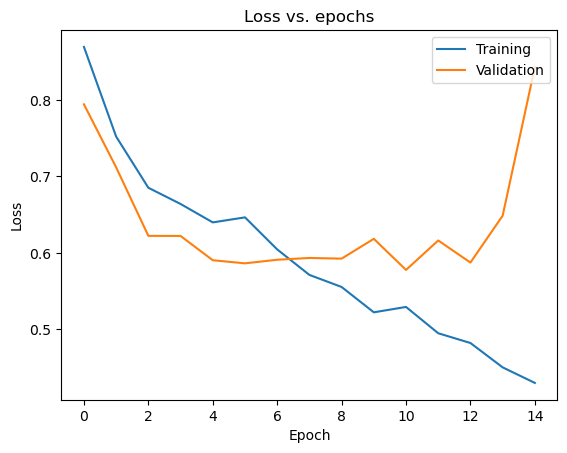

In [199]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history3 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [200]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    BatchNormalization(momentum=0.95), 
    Dropout(0.4),
    Dense(30, activation='relu'),
    BatchNormalization(momentum=0.95),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 218ms/step - binary_accuracy: 0.5456 - loss: 0.9327 - val_binary_accuracy: 0.5623 - val_loss: 1.2102
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - binary_accuracy: 0.6146 - loss: 0.7595 - val_binary_accuracy: 0.5256 - val_loss: 0.7174
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 182ms/step - binary_accuracy: 0.5615 - loss: 0.7800 - val_binary_accuracy: 0.5842 - val_loss: 0.7256
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - binary_accuracy: 0.6002 - loss: 0.7193 - val_binary_accuracy: 0.6136 - val_loss: 0.6417
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - binary_accuracy: 0.6377 - loss: 0.6659 - val_binary_accuracy: 0.6447 - val_loss: 0.6420
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - binary_accuracy: 0.6468 - loss: 0.6431 - val_binary_accuracy: 0.5916 - val_loss: 1.2807
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - binary_accuracy: 0.6412 - loss: 0.6746 - val_binary_accuracy: 0.6777 - val_loss: 0.6494
Epoch

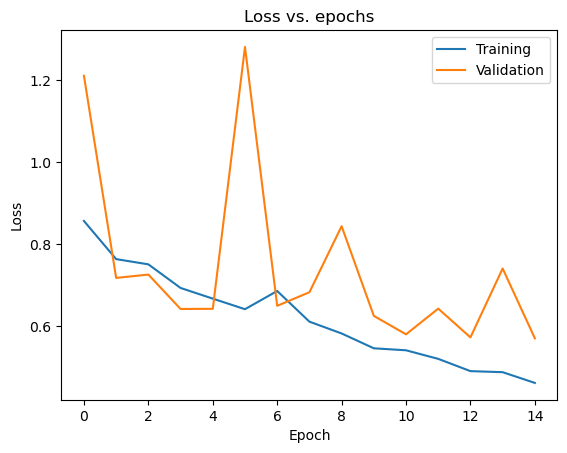

In [201]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history4 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [222]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu"),
    BatchNormalization(epsilon = 0.0001), 
    Dropout(0.4),
    Dense(30, activation='relu'),
    BatchNormalization(epsilon=0.0001),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

In [223]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history5 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [221]:
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])
plt.plot(history5.history['val_loss'])

plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['drop=0.5', 'drop=0.4','momentum=0.95, drop=0.5','momemtum=0.95, drop=0.5','epsilon=0.0001, drop=0.4'], loc='upper right')
plt.show()

g.

In [136]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - binary_accuracy: 0.5441 - loss: 1.1010 - val_binary_accuracy: 0.5348 - val_loss: 1.0558
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - binary_accuracy: 0.5390 - loss: 1.0290 - val_binary_accuracy: 0.5018 - val_loss: 0.9756
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - binary_accuracy: 0.5625 - loss: 0.9706 - val_binary_accuracy: 0.4927 - val_loss: 0.9137
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - binary_accuracy: 0.5996 - loss: 0.8433 - val_binary_accuracy: 0.4853 - val_loss: 2.6924
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - binary_accuracy: 0.5897 - loss: 0.8269 - val_binary_accuracy: 0.5403 - val_loss: 0.8588
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - binary_accuracy: 0.6385 - loss: 0.7614 - val_binary_accuracy: 0.5055 - val_loss: 0.8382
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - binary_accuracy: 0.6059 - loss: 0.7782 - val_binary_accuracy: 0.4945 - val_loss: 0.8418
Epoch 

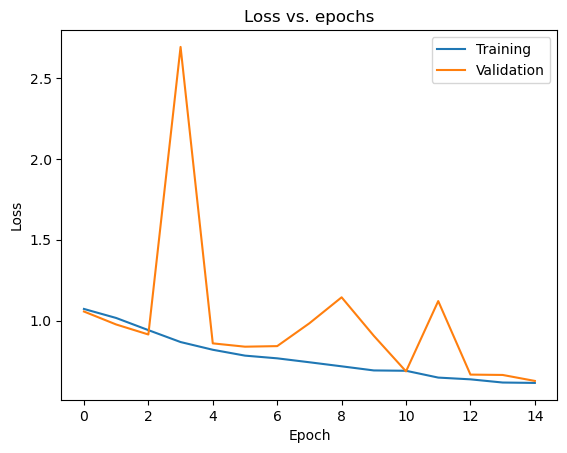

In [137]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [138]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.005)),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 118ms/step - binary_accuracy: 0.5098 - loss: 1.5952 - val_binary_accuracy: 0.4945 - val_loss: 1.6563
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 125ms/step - binary_accuracy: 0.5465 - loss: 1.2473 - val_binary_accuracy: 0.5659 - val_loss: 1.0207
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - binary_accuracy: 0.5461 - loss: 1.1244 - val_binary_accuracy: 0.4853 - val_loss: 3.0725
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - binary_accuracy: 0.5705 - loss: 0.9837 - val_binary_accuracy: 0.5440 - val_loss: 0.9249
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - binary_accuracy: 0.5746 - loss: 0.9409 - val_binary_accuracy: 0.5897 - val_loss: 0.8517
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - binary_accuracy: 0.5705 - loss: 0.9184 - val_binary_accuracy: 0.5440 - val_loss: 0.8660
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - binary_accuracy: 0.5554 - loss: 0.8855 - val_binary_accuracy: 0.5147 - val_loss: 1.0498
Epoch 

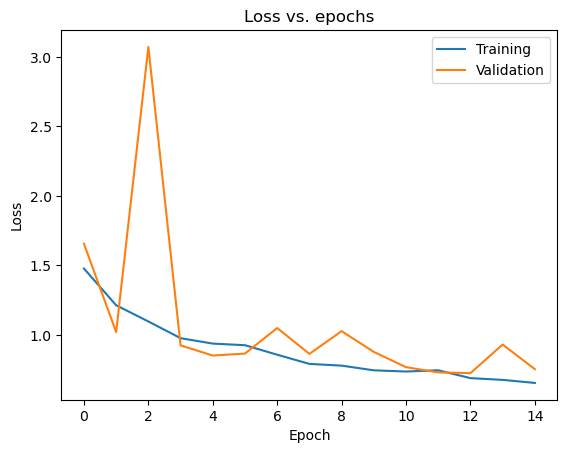

In [139]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history2 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [141]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 157ms/step - binary_accuracy: 0.4854 - loss: 2.4663 - val_binary_accuracy: 0.5220 - val_loss: 3.1997
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - binary_accuracy: 0.5609 - loss: 1.7984 - val_binary_accuracy: 0.5128 - val_loss: 1.4971
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - binary_accuracy: 0.5828 - loss: 1.4059 - val_binary_accuracy: 0.5147 - val_loss: 6.5315
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 169ms/step - binary_accuracy: 0.6053 - loss: 1.2208 - val_binary_accuracy: 0.6502 - val_loss: 1.0423
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - binary_accuracy: 0.6334 - loss: 1.0907 - val_binary_accuracy: 0.6740 - val_loss: 0.9990
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 163ms/step - binary_accuracy: 0.6587 - loss: 1.0011 - val_binary_accuracy: 0.5147 - val_loss: 1.2935
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 143ms/step - binary_accuracy: 0.6789 - loss: 0.9072 - val_binary_accuracy: 0.6520 - val_loss: 0.9318
Epoch

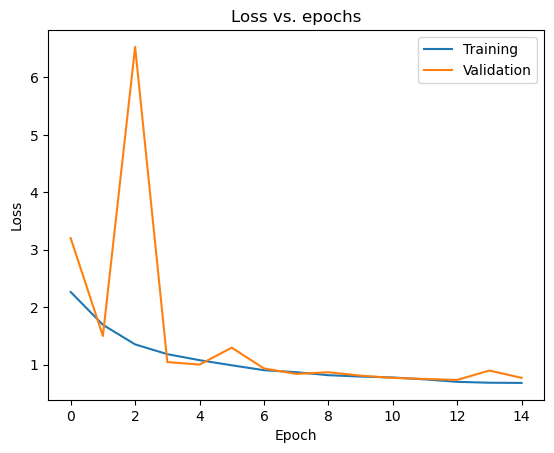

In [142]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history3 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [143]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.05)),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 141ms/step - binary_accuracy: 0.5361 - loss: 6.1811 - val_binary_accuracy: 0.6758 - val_loss: 3.0730
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - binary_accuracy: 0.5509 - loss: 2.9362 - val_binary_accuracy: 0.5110 - val_loss: 2.4469
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - binary_accuracy: 0.6227 - loss: 2.1033 - val_binary_accuracy: 0.6319 - val_loss: 1.6422
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - binary_accuracy: 0.6203 - loss: 1.6664 - val_binary_accuracy: 0.5806 - val_loss: 1.5033
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - binary_accuracy: 0.6147 - loss: 1.4154 - val_binary_accuracy: 0.5201 - val_loss: 1.3805
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - binary_accuracy: 0.6202 - loss: 1.2795 - val_binary_accuracy: 0.6007 - val_loss: 1.1116
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - binary_accuracy: 0.6089 - loss: 1.1134 - val_binary_accuracy: 0.4853 - val_loss: 1.3093
Epoch 

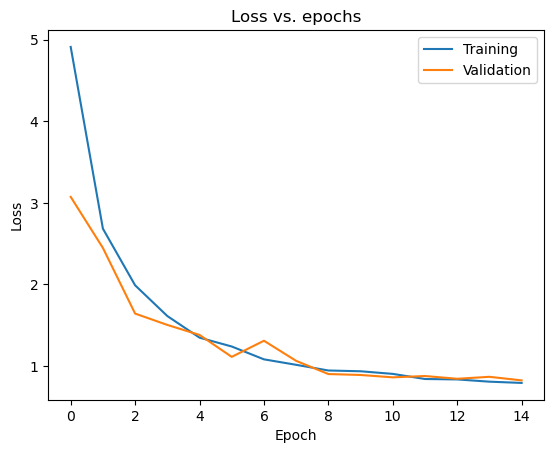

In [144]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history4 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [145]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.1)),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - binary_accuracy: 0.5188 - loss: 9.1486 - val_binary_accuracy: 0.5128 - val_loss: 4.7606
Epoch 2/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - binary_accuracy: 0.5343 - loss: 3.6620 - val_binary_accuracy: 0.4890 - val_loss: 2.8565
Epoch 3/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - binary_accuracy: 0.5208 - loss: 2.7068 - val_binary_accuracy: 0.5147 - val_loss: 2.2886
Epoch 4/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - binary_accuracy: 0.5653 - loss: 2.0883 - val_binary_accuracy: 0.5366 - val_loss: 1.6487
Epoch 5/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - binary_accuracy: 0.5757 - loss: 1.6113 - val_binary_accuracy: 0.5495 - val_loss: 1.3273
Epoch 6/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - binary_accuracy: 0.5999 - loss: 1.3022 - val_binary_accuracy: 0.6227 - val_loss: 1.1358
Epoch 7/15
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - binary_accuracy: 0.6193 - loss: 1.1241 - val_binary_accuracy: 0.5769 - val_loss: 1.0544
Epoch 

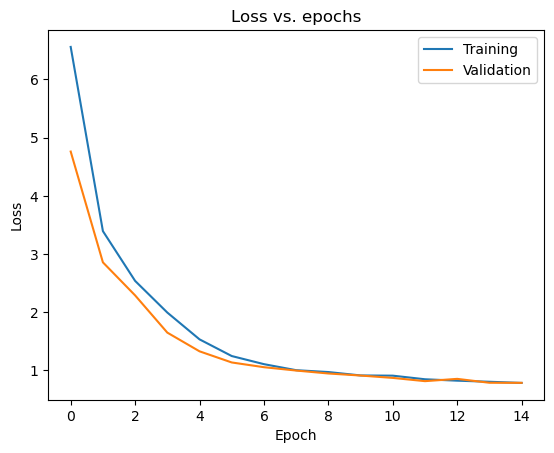

In [146]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

history5 = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

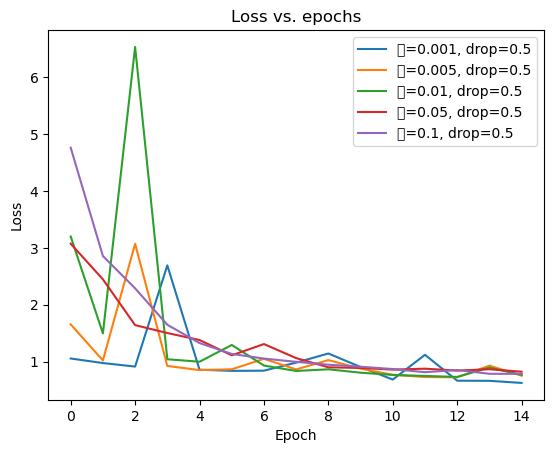

In [149]:
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.plot(history4.history['val_loss'])
plt.plot(history5.history['val_loss'])

plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['𝜆=0.001, drop=0.5', '𝜆=0.005, drop=0.5','𝜆=0.01, drop=0.5','𝜆=0.05, drop=0.5','𝜆=0.1, drop=0.5'], loc='upper right')
plt.show()

h.

In [205]:
model4 = Sequential([
    Conv2D(filters=4, kernel_size=(3,3),strides=(1,1),padding='valid', activation = 'relu', input_shape = (60,60,3)),
    MaxPooling2D(pool_size=(3,3), strides=(1,1), padding='valid'),
    Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='valid',activation = 'relu'),
    MaxPooling2D(pool_size=(3,3),strides=(1,1)),
    Flatten(),
    Dense(60, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(), 
    Dropout(0.5),
    Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [206]:
model4.compile(
    optimizer = 'rmsprop',  
    loss = 'binary_crossentropy', 
    metrics = ['binary_accuracy'] 
)

In [214]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.02, patience=4)

In [215]:
history = model4.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2,
                    callbacks=[early_stopping])

In [216]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()